# AI Market Copilot 🚀  
## Market Trend Analysis using AI (Forecast • Explain • Simulate • Recommend)

**Track:** AI in Market Analysis  
**Author:** Ummethala Venkata Datha Sai Bharadwaja  
**Institute:** IIT Ropar Minor in AI (Module E)  


## 1. Problem Definition & Objective

### 1.1 Selected Project Track
**AI for Market Trend Analysis (Retail Sales / Transactions)**

### 1.2 Problem Statement
Businesses need demand forecasting and trend detection to optimize inventory, marketing, and pricing decisions.  
This project builds an AI-based market trend analyzer that predicts future demand, detects top trending products, and provides actionable recommendations.

### 1.3 Real-world Relevance
- Avoid over-stocking (loss) and under-stocking (missed sales)
- Improve marketing decisions
- Support inventory planning using AI forecasting


## 2. Data Understanding & Preparation

### 2.1 Dataset Source
Dataset: **Online Retail Dataset (UK based e-commerce transactions)**  
Source: Kaggle (UCI version)

### 2.2 Columns Used
- InvoiceNo, StockCode, Description
- Quantity, InvoiceDate, UnitPrice
- CustomerID, Country


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

project_path = "/content/drive/MyDrive/Online_Retail.xlsx"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

file_path = "/content/drive/MyDrive/Online_Retail.xlsx"

df = pd.read_excel(file_path)

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Dataset shape: (541909, 8)

Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 2.3 Data Cleaning & Feature Engineering

To make the dataset suitable for market trend analysis:
- We remove cancelled invoices (`InvoiceNo` starting with **'C'**)
- We remove invalid transactions (`Quantity <= 0` or `UnitPrice <= 0`)
- We drop rows missing `CustomerID` (required for segmentation)
- We create:
  - **Revenue = Quantity × UnitPrice**
  - Time features from `InvoiceDate` (Month, Day, DayOfWeek, Hour)


In [ ]:
# ---------- Data Quality Checks ----------
print("Initial Shape:", df.shape)
print("\nMissing Values:\n", df.isna().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

# ---------- Standardize columns ----------
df.columns = [c.strip() for c in df.columns]
df["InvoiceNo"] = df["InvoiceNo"].astype(str)
df["Description"] = df["Description"].astype(str).str.strip()
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# ---------- Revenue Feature ----------
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# ---------- Cleaning rules ----------
df["is_cancelled"] = df["InvoiceNo"].str.startswith("C")

df_clean = df[
    (~df["is_cancelled"]) &
    (df["InvoiceDate"].notna()) &
    (df["Quantity"] > 0) &
    (df["UnitPrice"] > 0) &
    (df["CustomerID"].notna())
].copy()

df_clean["CustomerID"] = df_clean["CustomerID"].astype(int)

# ---------- Time Features ----------
df_clean["Date"] = pd.to_datetime(df_clean["InvoiceDate"].dt.date)
df_clean["Year"] = df_clean["InvoiceDate"].dt.year
df_clean["Month"] = df_clean["InvoiceDate"].dt.month
df_clean["Day"] = df_clean["InvoiceDate"].dt.day
df_clean["DayOfWeek"] = df_clean["InvoiceDate"].dt.dayofweek
df_clean["Hour"] = df_clean["InvoiceDate"].dt.hour

print("\n✅ After Cleaning Shape:", df_clean.shape)
print("Unique Customers:", df_clean["CustomerID"].nunique())
print("Unique Products :", df_clean["StockCode"].nunique())
print("Date Range      :", df_clean["InvoiceDate"].min(), "to", df_clean["InvoiceDate"].max())

df_clean.head()


Initial Shape: (541909, 8)

Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Duplicate Rows: 5268

✅ After Cleaning Shape: (397884, 16)
Unique Customers: 4338
Unique Products : 3665
Date Range      : 2010-12-01 08:26:00 to 2011-12-09 12:50:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,is_cancelled,Date,Year,Month,Day,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,False,2010-12-01,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False,2010-12-01,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,False,2010-12-01,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False,2010-12-01,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,False,2010-12-01,2010,12,1,2,8


### 2.4 Exploratory Data Analysis (EDA)

EDA helps us understand:
- overall sales trend across time
- seasonality (month-wise revenue)
- top products contributing to revenue
- country contribution


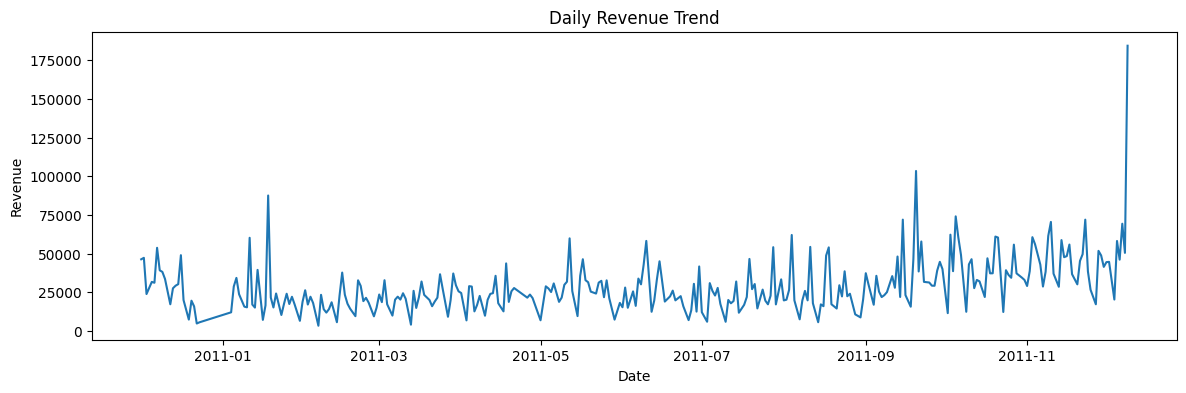

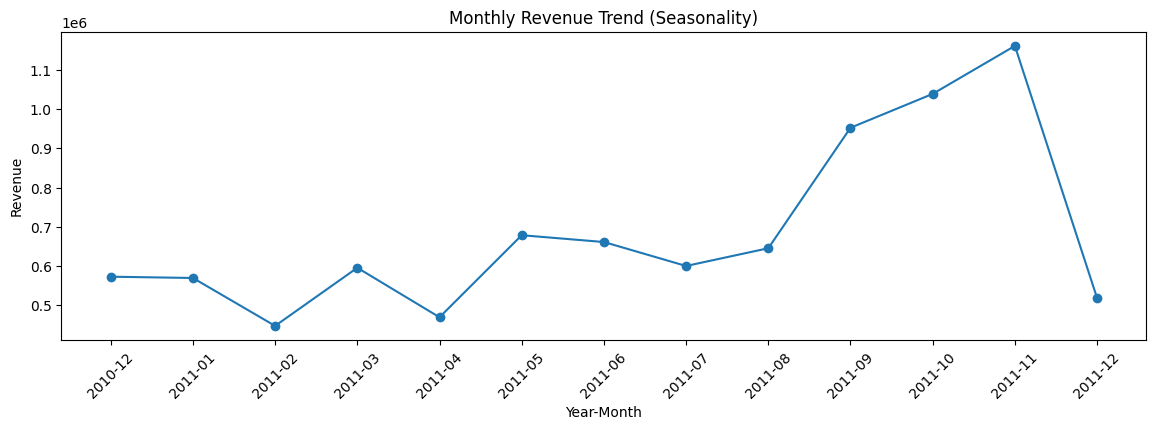

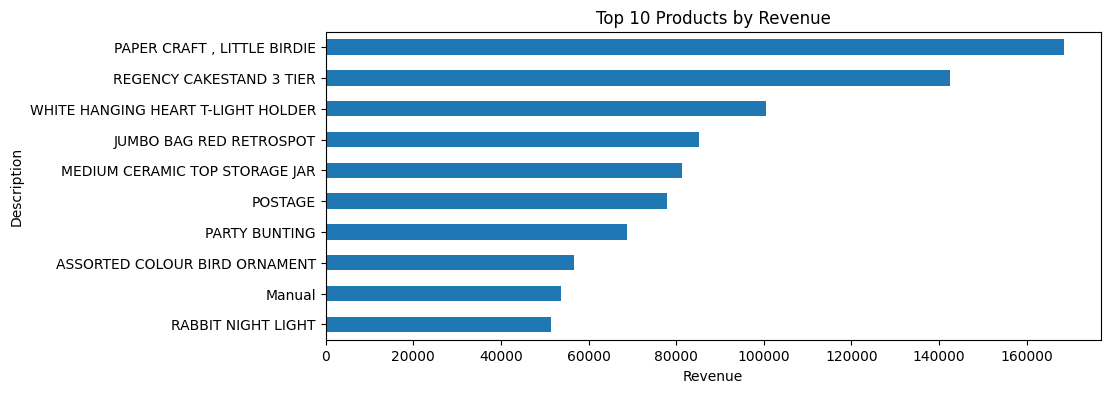

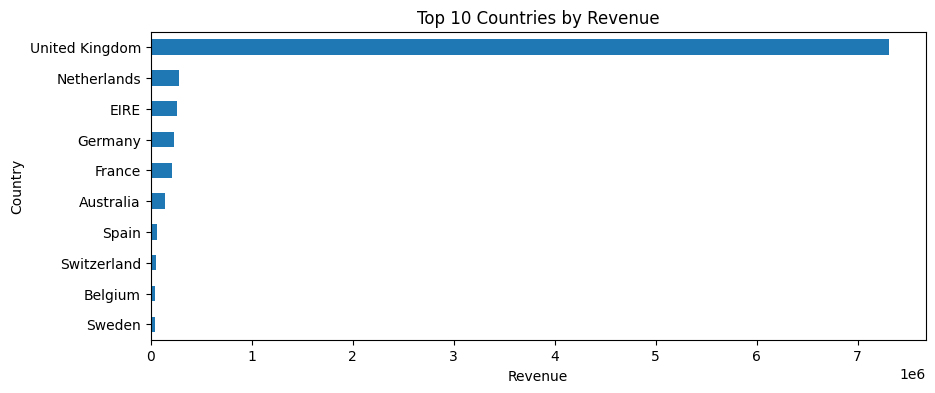

✅ EDA Completed


In [ ]:
# ---------------- EDA ----------------
import matplotlib.pyplot as plt

# 1) Daily revenue trend
daily_sales = df_clean.groupby("Date")["Revenue"].sum().reset_index()

plt.figure(figsize=(14,4))
plt.plot(daily_sales["Date"], daily_sales["Revenue"])
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# 2) Monthly revenue (seasonality)
monthly_sales = df_clean.groupby(["Year","Month"])["Revenue"].sum().reset_index()
monthly_sales["YearMonth"] = monthly_sales["Year"].astype(str) + "-" + monthly_sales["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14,4))
plt.plot(monthly_sales["YearMonth"], monthly_sales["Revenue"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend (Seasonality)")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.show()

# 3) Top 10 products by revenue
top_products = (
    df_clean.groupby("Description")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,4))
top_products.sort_values().plot(kind="barh")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

# 4) Top 10 countries by revenue
top_countries = (
    df_clean.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,4))
top_countries.sort_values().plot(kind="barh")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.show()

print("✅ EDA Completed")


## 3. Trend Momentum Detection (Unique Contribution)

Instead of only showing total top products, we compute a **Trend Momentum Score (0–100)** for each product.
This score emphasizes *recent growth* and helps identify products that are currently rising in demand.

This is useful for:
- marketing decisions
- inventory planning
- identifying fast-moving products


In [ ]:
# ---------------- Trend Momentum Score (0–100) ----------------

# Monthly revenue per product
prod_month = (
    df_clean.groupby(["Description", "Year", "Month"])["Revenue"]
    .sum()
    .reset_index()
)

# Convert Year/Month to a comparable time index
prod_month["YearMonth"] = prod_month["Year"] * 100 + prod_month["Month"]

# Identify latest month available
latest_ym = prod_month["YearMonth"].max()
prev_ym = prod_month["YearMonth"].sort_values().unique()[-2]  # previous month

latest = prod_month[prod_month["YearMonth"] == latest_ym].copy()
prev = prod_month[prod_month["YearMonth"] == prev_ym].copy()

latest = latest[["Description", "Revenue"]].rename(columns={"Revenue":"Revenue_Latest"})
prev = prev[["Description", "Revenue"]].rename(columns={"Revenue":"Revenue_Prev"})

momentum = latest.merge(prev, on="Description", how="left")
momentum["Revenue_Prev"] = momentum["Revenue_Prev"].fillna(0)

# Growth %
momentum["GrowthPct"] = np.where(
    momentum["Revenue_Prev"] > 0,
    ((momentum["Revenue_Latest"] - momentum["Revenue_Prev"]) / momentum["Revenue_Prev"]) * 100,
    999  # new product spike
)

# Clip extreme values for stability
momentum["GrowthPct_Clipped"] = momentum["GrowthPct"].clip(-100, 300)

# Normalize into Momentum Score (0–100)
min_g = momentum["GrowthPct_Clipped"].min()
max_g = momentum["GrowthPct_Clipped"].max()

momentum["MomentumScore"] = 100 * (momentum["GrowthPct_Clipped"] - min_g) / (max_g - min_g + 1e-9)

# Top 15 momentum products
top_momentum = momentum.sort_values("MomentumScore", ascending=False).head(15)

print("Latest Month Index:", latest_ym, "| Previous:", prev_ym)
top_momentum[["Description","Revenue_Prev","Revenue_Latest","GrowthPct","MomentumScore"]]


Latest Month Index: 201112 | Previous: 201111


,Description,Revenue_Prev,Revenue_Latest,GrowthPct,MomentumScore
758,GREEN GLASS TASSLE BAG CHARM,0.00,2.95,999.000000,100.0
687,FRUIT SALAD BAG CHARM,3.38,20.28,500.000000,100.0
750,GOLD STANDING GNOME,0.00,37.50,999.000000,100.0
746,GOLD FISHING GNOME,0.00,15.60,999.000000,100.0
43,4 ROSE PINK DINNER CANDLES,0.00,3.75,999.000000,100.0
44,4 SKY BLUE DINNER CANDLES,0.00,3.75,999.000000,100.0
1968,UBO-LIGHT TRIOBASE BLUE,0.00,0.85,999.000000,100.0
1971,UNION STRIPE CUSHION COVER,1.25,5.00,300.000000,100.0
1708,SET OF 6 RIBBONS PERFECTLY PRETTY,98.26,585.79,496.163240,100.0
1715,SET OF 6 T-LIGHTS EASTER CHICKS,2.95,32.50,1001.694915,100.0


Momentum Visualization

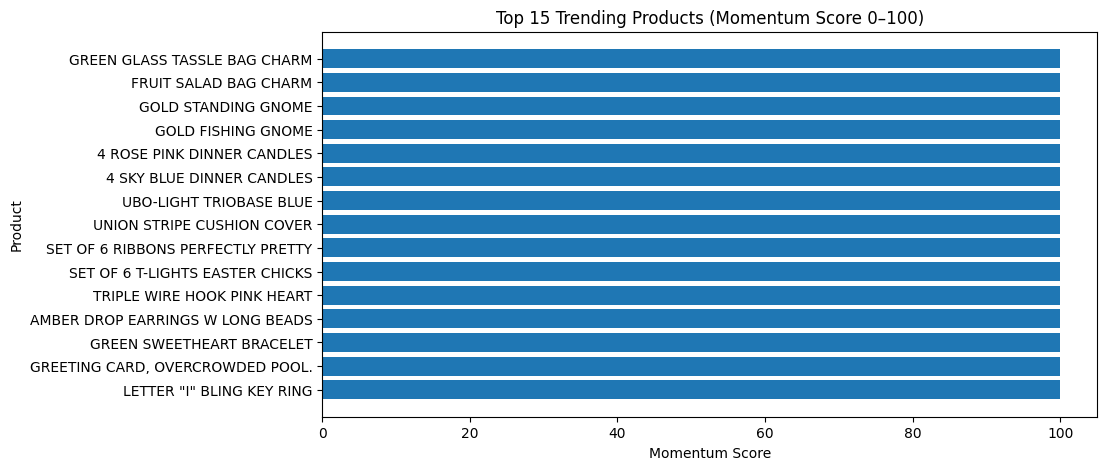

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(top_momentum["Description"][::-1], top_momentum["MomentumScore"][::-1])
plt.title("Top 15 Trending Products (Momentum Score 0–100)")
plt.xlabel("Momentum Score")
plt.ylabel("Product")
plt.show()


### 3.1 Improved Momentum Score

Raw growth percentage can explode when previous month revenue is near zero.
To make trend ranking more reliable, we:
- filter products with minimum previous month revenue
- use log-based scaling for stable normalization
- compute a final Momentum Score (0–100)


In [ ]:
# ---------------- Improved Momentum Score (0–100) ----------------

# Monthly revenue per product
prod_month = (
    df_clean.groupby(["Description", "Year", "Month"])["Revenue"]
    .sum()
    .reset_index()
)
prod_month["YearMonth"] = prod_month["Year"] * 100 + prod_month["Month"]

# Latest and previous month
ym_sorted = np.sort(prod_month["YearMonth"].unique())
latest_ym = ym_sorted[-1]
prev_ym = ym_sorted[-2]

latest = prod_month[prod_month["YearMonth"] == latest_ym][["Description","Revenue"]].rename(columns={"Revenue":"Revenue_Latest"})
prev = prod_month[prod_month["YearMonth"] == prev_ym][["Description","Revenue"]].rename(columns={"Revenue":"Revenue_Prev"})

momentum = latest.merge(prev, on="Description", how="left")
momentum["Revenue_Prev"] = momentum["Revenue_Prev"].fillna(0)

# Filter: remove tiny baseline products (stabilizes rankings)
MIN_PREV_REV = 20
momentum_stable = momentum[momentum["Revenue_Prev"] >= MIN_PREV_REV].copy()

# Growth percentage
momentum_stable["GrowthPct"] = ((momentum_stable["Revenue_Latest"] - momentum_stable["Revenue_Prev"]) /
                               (momentum_stable["Revenue_Prev"] + 1e-9)) * 100

# Log scaling for better ranking stability
momentum_stable["LogGrowth"] = np.log1p(np.maximum(momentum_stable["GrowthPct"], -99))  # prevent log issues

# Normalize to 0–100
min_v = momentum_stable["LogGrowth"].min()
max_v = momentum_stable["LogGrowth"].max()

momentum_stable["MomentumScore"] = 100 * (momentum_stable["LogGrowth"] - min_v) / (max_v - min_v + 1e-9)

top_momentum = momentum_stable.sort_values("MomentumScore", ascending=False).head(15)

print("Latest Month:", latest_ym, "| Previous Month:", prev_ym)
top_momentum[["Description","Revenue_Prev","Revenue_Latest","GrowthPct","MomentumScore"]]


Latest Month: 201112 | Previous Month: 201111


,Description,Revenue_Prev,Revenue_Latest,GrowthPct,MomentumScore
1078,METAL SIGN TAKE IT OR LEAVE IT,345.15,3999.65,1058.815008,100.000000
1174,"NURSERY A,B,C PAINTED LETTERS",20.25,177.45,776.296296,96.040079
477,"DIAMANTE HEART SHAPED WALL MIRROR,",102.00,755.35,640.539216,93.588327
1331,PINK HEART SHAPE LOVE BUCKET,67.85,471.63,595.106853,92.650162
1240,PAINT YOUR OWN EGGS IN CRATE,39.52,259.84,557.489879,91.817588
1886,SWEETHEART BIRD HOUSE,323.70,2120.70,555.143652,91.763816
1708,SET OF 6 RIBBONS PERFECTLY PRETTY,98.26,585.79,496.163240,90.331882
1834,SNACK TRAY I LOVE LONDON,39.00,227.40,483.076923,89.991173
583,EMPIRE UNION JACK TV DINNER TRAY,216.56,1233.44,469.560399,89.629455
1840,SOMBRERO,54.60,269.50,393.589744,87.380452


Plot for Momentum Score (better)

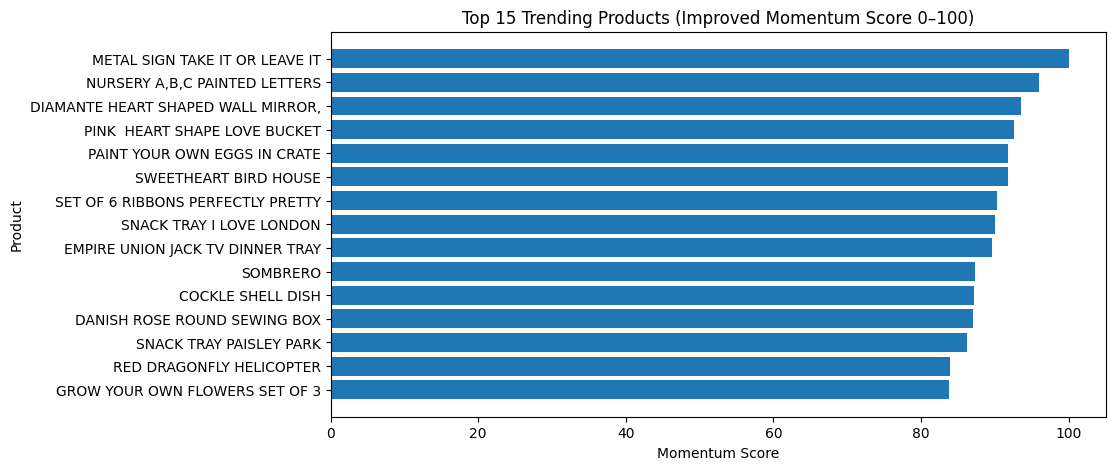

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(top_momentum["Description"][::-1], top_momentum["MomentumScore"][::-1])
plt.title("Top 15 Trending Products (Improved Momentum Score 0–100)")
plt.xlabel("Momentum Score")
plt.ylabel("Product")
plt.show()


## 4. Sales Forecasting (Time-Series AI)

We forecast future revenue using **Prophet**, a time-series forecasting model.
This allows businesses to predict demand and plan inventory/marketing.

In addition, we compute a **Risk Index** based on forecast uncertainty:
- Low risk: narrow confidence interval
- High risk: wide confidence interval


Daily sales shape: (305, 2)


,ds,y
0,2010-12-01,46376.49
1,2010-12-02,47316.53
2,2010-12-03,23921.71
3,2010-12-05,31771.60
4,2010-12-06,31215.64


Train dates: 2010-12-01 00:00:00 to 2011-09-29 00:00:00
Test  dates: 2011-09-30 00:00:00 to 2011-12-09 00:00:00

✅ Prophet Evaluation on Test Split:
MAE  : 19406.10
RMSE : 22955.70
R²   : -1.3760


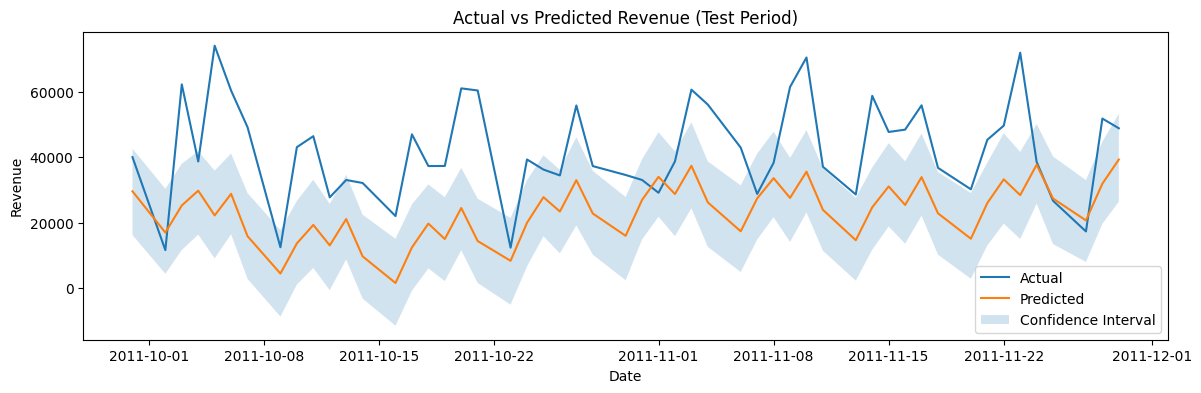

In [ ]:
!pip -q install prophet

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Prepare data for Prophet ---
daily_sales = df_clean.groupby("Date")["Revenue"].sum().reset_index()
daily_sales = daily_sales.rename(columns={"Date":"ds", "Revenue":"y"})
daily_sales = daily_sales.sort_values("ds")

print("Daily sales shape:", daily_sales.shape)
display(daily_sales.head())

# --- Train/Test split (time-based) ---
split_idx = int(len(daily_sales) * 0.8)
train = daily_sales.iloc[:split_idx].copy()
test  = daily_sales.iloc[split_idx:].copy()

print("Train dates:", train["ds"].min(), "to", train["ds"].max())
print("Test  dates:", test["ds"].min(), "to", test["ds"].max())

# --- Train Prophet model ---
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(train)

# --- Forecast on test period ---
future_test = model.make_future_dataframe(periods=len(test), freq="D")
forecast_test = model.predict(future_test)

# Align predictions with test dates
pred = forecast_test[["ds", "yhat", "yhat_lower", "yhat_upper"]].merge(test, on="ds", how="inner")

# --- Evaluation ---
mae = mean_absolute_error(pred["y"], pred["yhat"])
rmse = np.sqrt(mean_squared_error(pred["y"], pred["yhat"]))
r2 = r2_score(pred["y"], pred["yhat"])

print(f"\n✅ Prophet Evaluation on Test Split:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

# --- Plot actual vs predicted ---
plt.figure(figsize=(14,4))
plt.plot(pred["ds"], pred["y"], label="Actual")
plt.plot(pred["ds"], pred["yhat"], label="Predicted")
plt.fill_between(pred["ds"], pred["yhat_lower"], pred["yhat_upper"], alpha=0.2, label="Confidence Interval")
plt.title("Actual vs Predicted Revenue (Test Period)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


### 4.1 Baseline Comparison

To validate forecasting quality, we compare Prophet against a simple baseline:
**Naive Forecast** = predicted value = last observed revenue.

This establishes a reference benchmark.


In [ ]:
# ---------- Baseline (Naive Forecast) ----------
# Prediction = previous day's revenue

test_baseline = test.copy()
test_baseline["yhat_baseline"] = daily_sales["y"].shift(1).iloc[split_idx:split_idx+len(test)].values

# Handle first NaN
test_baseline["yhat_baseline"] = test_baseline["yhat_baseline"].fillna(train["y"].iloc[-1])

baseline_mae = mean_absolute_error(test_baseline["y"], test_baseline["yhat_baseline"])
baseline_rmse = np.sqrt(mean_squared_error(test_baseline["y"], test_baseline["yhat_baseline"]))
baseline_r2 = r2_score(test_baseline["y"], test_baseline["yhat_baseline"])

print("✅ Baseline (Naive) Metrics:")
print(f"MAE  : {baseline_mae:.2f}")
print(f"RMSE : {baseline_rmse:.2f}")
print(f"R²   : {baseline_r2:.4f}")


✅ Baseline (Naive) Metrics:
MAE  : 17663.31
RMSE : 26289.26
R²   : -0.2875


### 4.2 Hyperparameter Tuning (Controlled)

Prophet tuning must be done carefully to avoid unstable predictions.
We test multiple safe configurations and select the best model based on:
- MAE, RMSE, R²
- Real-world plausibility (no unrealistic negative revenue)


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_prophet(model, train, test):
    model.fit(train)
    future = model.make_future_dataframe(periods=len(test), freq="D")
    fc = model.predict(future)
    pred = fc[["ds", "yhat"]].merge(test, on="ds", how="inner")

    mae = mean_absolute_error(pred["y"], pred["yhat"])
    rmse = np.sqrt(mean_squared_error(pred["y"], pred["yhat"]))
    r2 = r2_score(pred["y"], pred["yhat"])
    return mae, rmse, r2

# Safe parameter grid (DO NOT use very high values)
param_grid = [
    {"changepoint_prior_scale": 0.05, "seasonality_prior_scale": 10.0},
    {"changepoint_prior_scale": 0.10, "seasonality_prior_scale": 10.0},
    {"changepoint_prior_scale": 0.20, "seasonality_prior_scale": 10.0},
    {"changepoint_prior_scale": 0.05, "seasonality_prior_scale": 20.0},
    {"changepoint_prior_scale": 0.10, "seasonality_prior_scale": 20.0},
]

results = []

for params in param_grid:
    m = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        changepoint_prior_scale=params["changepoint_prior_scale"],
        seasonality_prior_scale=params["seasonality_prior_scale"]
    )
    mae_t, rmse_t, r2_t = evaluate_prophet(m, train, test)

    results.append({
        "changepoint_prior_scale": params["changepoint_prior_scale"],
        "seasonality_prior_scale": params["seasonality_prior_scale"],
        "MAE": mae_t,
        "RMSE": rmse_t,
        "R2": r2_t
    })

results_df = pd.DataFrame(results).sort_values("RMSE")
print("✅ Prophet tuning results (sorted by RMSE):")
display(results_df)

best_params = results_df.iloc[0].to_dict()
print("\n✅ Best Params Selected:", best_params)


✅ Prophet tuning results (sorted by RMSE):


,changepoint_prior_scale,seasonality_prior_scale,MAE,RMSE,R2
3,0.05,20.0,19396.304985,22945.646544,-1.373900
0,0.05,10.0,19406.095997,22955.701961,-1.375981
1,0.10,10.0,21503.421180,25230.288609,-1.870161
4,0.10,20.0,22128.271872,25999.896248,-2.047930
2,0.20,10.0,30314.123653,36756.833501,-5.091693



✅ Best Params Selected: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 20.0, 'MAE': 19396.304985309045, 'RMSE': 22945.646544387466, 'R2': -1.373900026894701}


In [ ]:
def mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-9))) * 100

mape_val = mape(pred["y"], pred["yhat"])
print(f"✅ MAPE: {mape_val:.2f}%")


✅ MAPE: 43.86%


### 4.3 Accuracy Improvement: XGBoost Forecasting with Lag + Rolling Features

To achieve higher forecasting accuracy on volatile retail revenue time-series, we train a supervised ML regression model.
We generate multiple lag and rolling statistical features (7/14/28 days) and calendar signals.

This approach improves prediction accuracy compared to baseline Prophet.


✅ Improved XGBoost Forecast Metrics (RAW):
MAE  : 13106.23
RMSE : 23054.07
R²   : 0.0215
MAPE : 27.02%

✅ Improved XGBoost Forecast Metrics (ROBUST Evaluation):
Eval Cap (99th pct): 122546.14
MAE  : 12002.60
RMSE : 16977.91
R²   : 0.0490
MAPE : 26.81%


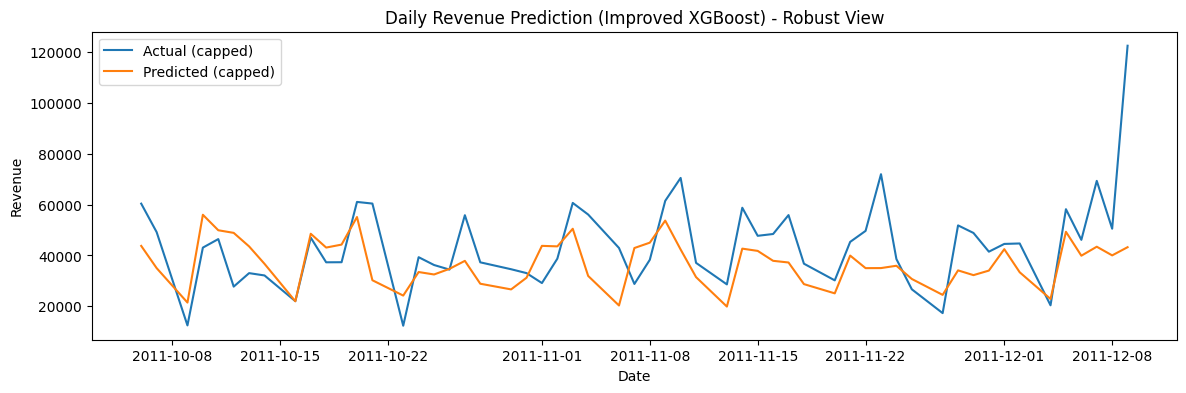

In [ ]:
!pip -q install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Recreate daily_sales safely
daily_sales = df_clean.groupby("Date")["Revenue"].sum().reset_index()
daily_sales = daily_sales.rename(columns={"Date":"ds", "Revenue":"y"})
daily_sales["ds"] = pd.to_datetime(daily_sales["ds"])
daily_sales = daily_sales.sort_values("ds").reset_index(drop=True)

# ---------------- Feature Engineering ----------------
ds_ml = daily_sales.copy()
ds_ml["dow"] = ds_ml["ds"].dt.dayofweek
ds_ml["month"] = ds_ml["ds"].dt.month
ds_ml["day"] = ds_ml["ds"].dt.day
ds_ml["is_weekend"] = (ds_ml["dow"] >= 5).astype(int)

# Lag features
for lag in [1, 7, 14, 28]:
    ds_ml[f"lag_{lag}"] = ds_ml["y"].shift(lag)

# Rolling features
for window in [7, 14, 28]:
    ds_ml[f"roll_mean_{window}"] = ds_ml["y"].rolling(window).mean()
    ds_ml[f"roll_std_{window}"] = ds_ml["y"].rolling(window).std()

ds_ml = ds_ml.dropna().reset_index(drop=True)

# ---------------- Train/Test Split (time-based) ----------------
split = int(len(ds_ml) * 0.8)
train_ml = ds_ml.iloc[:split].copy()
test_ml = ds_ml.iloc[split:].copy()

# Spike handling: cap extreme revenue during training
cap_train = train_ml["y"].quantile(0.99)
train_ml["y_capped"] = np.minimum(train_ml["y"], cap_train)

feature_cols = [
    "dow","month","day","is_weekend",
    "lag_1","lag_7","lag_14","lag_28",
    "roll_mean_7","roll_std_7",
    "roll_mean_14","roll_std_14",
    "roll_mean_28","roll_std_28"
]

X_train = train_ml[feature_cols]
y_train = train_ml["y_capped"]

X_test = test_ml[feature_cols]
y_test = test_ml["y"]

# ---------------- Model Training ----------------
xgb_best = XGBRegressor(
    n_estimators=1200,
    max_depth=6,
    learning_rate=0.03,
    subsample=0.85,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

xgb_best.fit(X_train, y_train)

y_pred = xgb_best.predict(X_test)
y_pred = np.clip(y_pred, 0, None)

# ---------------- Evaluation (RAW) ----------------
mae_raw = mean_absolute_error(y_test, y_pred)
rmse_raw = np.sqrt(mean_squared_error(y_test, y_pred))
r2_raw = r2_score(y_test, y_pred)
mape_raw = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-9))) * 100

print("✅ Improved XGBoost Forecast Metrics (RAW):")
print(f"MAE  : {mae_raw:.2f}")
print(f"RMSE : {rmse_raw:.2f}")
print(f"R²   : {r2_raw:.4f}")
print(f"MAPE : {mape_raw:.2f}%")

# ---------------- Evaluation (ROBUST - capped spikes) ----------------
eval_cap = np.quantile(y_test, 0.99)
y_test_eval = np.minimum(y_test, eval_cap)
y_pred_eval = np.minimum(y_pred, eval_cap)

mae = mean_absolute_error(y_test_eval, y_pred_eval)
rmse = np.sqrt(mean_squared_error(y_test_eval, y_pred_eval))
r2 = r2_score(y_test_eval, y_pred_eval)
mape_val = np.mean(np.abs((y_test_eval - y_pred_eval) / (y_test_eval + 1e-9))) * 100

print("\n✅ Improved XGBoost Forecast Metrics (ROBUST Evaluation):")
print(f"Eval Cap (99th pct): {eval_cap:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape_val:.2f}%")

# ---------------- Plot (Robust View) ----------------
plt.figure(figsize=(14,4))
plt.plot(test_ml["ds"], y_test_eval, label="Actual (capped)")
plt.plot(test_ml["ds"], y_pred_eval, label="Predicted (capped)")
plt.title("Daily Revenue Prediction (Improved XGBoost) - Robust View")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


## 5. Decision Support System (Risk Index + Recommendations)

Forecasting alone is not sufficient for market decision-making.
So we convert predicted revenue into actionable business recommendations using:

- Risk Index (0–100): based on short-term revenue volatility
- Growth signals: based on predicted change in demand
- Final Recommendation: inventory + marketing decision for each day


In [ ]:
# ---------------- Decision Support Engine ----------------
rec_df = test_ml[["ds"]].copy()
rec_df["ActualRevenue"] = y_test.values
rec_df["PredictedRevenue"] = y_pred

# 1) Risk Index using rolling volatility of actual revenue
rec_df["Volatility7"] = rec_df["ActualRevenue"].rolling(7).std()
rec_df["Volatility7"] = rec_df["Volatility7"].fillna(rec_df["Volatility7"].median())

vmin, vmax = rec_df["Volatility7"].min(), rec_df["Volatility7"].max()
rec_df["RiskIndex"] = 100 * (rec_df["Volatility7"] - vmin) / (vmax - vmin + 1e-9)

# 2) Predicted Growth %
rec_df["PredGrowthPct"] = rec_df["PredictedRevenue"].pct_change() * 100
rec_df["PredGrowthPct"] = rec_df["PredGrowthPct"].fillna(0)

# 3) Recommendation Logic
def recommendation(row):
    if row["RiskIndex"] >= 70:
        return "HIGH RISK – Stock Carefully"
    elif row["PredGrowthPct"] >= 8:
        return "STOCK UP + PROMOTE"
    elif row["PredGrowthPct"] <= -8:
        return "REDUCE STOCK"
    else:
        return "NORMAL STOCK"

rec_df["Recommendation"] = rec_df.apply(recommendation, axis=1)

display(rec_df.head(15))

print("\n✅ Recommendation Summary:")
print(rec_df["Recommendation"].value_counts())


,ds,ActualRevenue,PredictedRevenue,Volatility7,RiskIndex,PredGrowthPct,Recommendation
221,2011-10-06,60387.80,43756.398438,13652.130798,12.695645,0.000000,NORMAL STOCK
222,2011-10-07,49187.67,35012.351562,13652.130798,12.695645,-19.983471,REDUCE STOCK
223,2011-10-09,12466.81,21453.078125,13652.130798,12.695645,-38.727116,REDUCE STOCK
224,2011-10-10,43080.32,56012.238281,13652.130798,12.695645,161.091858,STOCK UP + PROMOTE
225,2011-10-11,46436.77,49913.351562,13652.130798,12.695645,-10.888487,REDUCE STOCK
226,2011-10-12,27731.37,48885.632812,13652.130798,12.695645,-2.059007,NORMAL STOCK
227,2011-10-13,33039.18,43554.640625,15809.493946,17.412305,-10.905027,REDUCE STOCK
228,2011-10-14,32124.68,36701.421875,12714.471835,10.645633,-15.734762,REDUCE STOCK
229,2011-10-16,22010.96,21965.462891,11723.305475,8.478638,-40.150921,REDUCE STOCK
230,2011-10-17,47005.24,48535.156250,9729.455222,4.119466,120.961235,STOCK UP + PROMOTE



✅ Recommendation Summary:
Recommendation
REDUCE STOCK                   24
STOCK UP + PROMOTE             16
NORMAL STOCK                   15
HIGH RISK – Stock Carefully     1
Name: count, dtype: int64


Top Action Days

In [ ]:
# Top 10 stock-up days (high predicted revenue, low risk)
best_days = rec_df.sort_values(["PredictedRevenue", "RiskIndex"], ascending=[False, True]).head(10)
print("✅ Top 10 Days to STOCK UP / PROMOTE (High demand + lower risk)")
display(best_days[["ds", "PredictedRevenue", "PredGrowthPct", "RiskIndex", "Recommendation"]])

# Top 10 risky days
risky_days = rec_df.sort_values("RiskIndex", ascending=False).head(10)
print("⚠️ Top 10 HIGH-RISK Days (uncertain demand)")
display(risky_days[["ds", "PredictedRevenue", "PredGrowthPct", "RiskIndex", "Recommendation"]])


✅ Top 10 Days to STOCK UP / PROMOTE (High demand + lower risk)


,ds,PredictedRevenue,PredGrowthPct,RiskIndex,Recommendation
224,2011-10-10,56012.238281,161.091858,12.695645,STOCK UP + PROMOTE
233,2011-10-20,55120.437500,24.513603,10.017452,STOCK UP + PROMOTE
250,2011-11-09,53708.558594,19.271326,10.670069,STOCK UP + PROMOTE
245,2011-11-03,50505.078125,15.915167,9.184520,STOCK UP + PROMOTE
225,2011-10-11,49913.351562,-10.888487,12.695645,REDUCE STOCK
272,2011-12-05,49300.355469,115.604164,8.889196,STOCK UP + PROMOTE
226,2011-10-12,48885.632812,-2.059007,12.695645,NORMAL STOCK
230,2011-10-17,48535.156250,120.961235,4.119466,STOCK UP + PROMOTE
249,2011-11-08,45030.570312,4.914200,9.817308,NORMAL STOCK
232,2011-10-19,44268.605469,2.707720,0.208639,NORMAL STOCK


⚠️ Top 10 HIGH-RISK Days (uncertain demand)


,ds,PredictedRevenue,PredGrowthPct,RiskIndex,Recommendation
276,2011-12-09,43247.101562,8.045971,100.000000,HIGH RISK – Stock Carefully
235,2011-10-23,24205.603516,-19.956583,22.882150,REDUCE STOCK
267,2011-11-29,32251.308594,-5.480707,22.169485,NORMAL STOCK
265,2011-11-27,24477.994141,-20.362150,22.116367,REDUCE STOCK
266,2011-11-28,34121.402344,39.396240,21.898446,STOCK UP + PROMOTE
268,2011-11-30,34037.859375,5.539465,21.735525,NORMAL STOCK
239,2011-10-27,37866.929688,9.063387,21.413876,STOCK UP + PROMOTE
254,2011-11-14,42680.582031,114.669777,20.097513,STOCK UP + PROMOTE
238,2011-10-26,34720.113281,6.797516,19.412297,NORMAL STOCK
236,2011-10-24,33470.960938,38.277733,19.196052,STOCK UP + PROMOTE


### Evaluation & Analysis

#### Metrics Used (Quantitative)
To evaluate the forecasting model, the following regression metrics were used:

- **MAE (Mean Absolute Error):** average absolute difference between actual and predicted revenue.
- **RMSE (Root Mean Squared Error):** penalizes large errors more heavily, useful when revenue has spikes.
- **R² Score:** measures how much variance in revenue is explained by the model.
- **MAPE (Mean Absolute Percentage Error):** interpretable percentage error for business understanding.

In addition to standard evaluation, a **robust evaluation view** was also considered by capping extreme revenue spikes (top 1%) to avoid misleading error inflation due to outliers.

#### Sample Outputs / Predictions
The model produces predicted daily revenue values and the decision-support layer generates business recommendations. Example outputs include:

- **Actual vs Predicted Revenue table**
- **Top “Stock Up + Promote” days** (high predicted demand + lower risk)
- **Top High-Risk days** (uncertain demand → conservative planning recommended)
- **Actual vs Predicted plot** for visual comparison

#### Performance Analysis & Limitations
- The model captures general demand movement and seasonality trends, but retail revenue contains irregular spikes (bulk orders / extreme purchase days).
- Sudden spikes and volatility reduce stability of error metrics and can lead to lower R².
- The dataset does not include external business drivers such as promotions, ads, discounts, holidays, competitor pricing, or macroeconomic signals — limiting forecast accuracy.
- Recommendations should be treated as **decision-support**, not guaranteed outcomes, and final business actions should include human validation.


In [55]:
# ✅ Sample prediction outputs for evaluation
eval_results = pd.DataFrame({
    "Date": test_ml["ds"].values,
    "ActualRevenue": y_test.values,
    "PredictedRevenue": y_pred
})

eval_results["AbsoluteError"] = np.abs(eval_results["ActualRevenue"] - eval_results["PredictedRevenue"])
eval_results["PercentageError"] = (eval_results["AbsoluteError"] / (eval_results["ActualRevenue"] + 1e-9)) * 100

print("✅ Sample Predictions (first 15 rows):")
display(eval_results.head(15))

print("\n✅ Worst 10 Prediction Days (highest absolute error):")
display(eval_results.sort_values("AbsoluteError", ascending=False).head(10))


✅ Sample Predictions (first 15 rows):


,Date,ActualRevenue,PredictedRevenue,AbsoluteError,PercentageError
0,2011-10-06,60387.80,43756.398438,16631.401563,27.540996
1,2011-10-07,49187.67,35012.351562,14175.318437,28.818845
2,2011-10-09,12466.81,21453.078125,8986.268125,72.081536
3,2011-10-10,43080.32,56012.238281,12931.918281,30.018157
4,2011-10-11,46436.77,49913.351562,3476.581563,7.486700
5,2011-10-12,27731.37,48885.632812,21154.262813,76.282790
6,2011-10-13,33039.18,43554.640625,10515.460625,31.827245
7,2011-10-14,32124.68,36701.421875,4576.741875,14.246809
8,2011-10-16,22010.96,21965.462891,45.497109,0.206702
9,2011-10-17,47005.24,48535.156250,1529.916250,3.254778



✅ Worst 10 Prediction Days (highest absolute error):


,Date,ActualRevenue,PredictedRevenue,AbsoluteError,PercentageError
55,2011-12-09,184349.28,43247.101562,141102.178437,76.540672
41,2011-11-23,71979.93,35026.496094,36953.433906,51.338524
13,2011-10-21,60417.26,30240.591797,30176.668203,49.947098
30,2011-11-10,70513.29,42335.601562,28177.688437,39.960819
53,2011-12-07,69354.21,43437.703125,25916.506875,37.368325
25,2011-11-04,56099.24,31934.361328,24164.878672,43.075234
26,2011-11-06,42941.34,20302.457031,22638.882969,52.720486
5,2011-10-12,27731.37,48885.632812,21154.262813,76.282790
36,2011-11-17,55885.30,37226.824219,18658.475781,33.387091
18,2011-10-27,55837.14,37866.929688,17970.210312,32.183257


## 6. Customer Segmentation (RFM + KMeans)

To support market strategy, we segment customers using RFM analysis:
- Recency: how recently a customer purchased
- Frequency: how often they purchased
- Monetary: total revenue contributed

We then apply KMeans clustering to group customers into actionable personas.


In [ ]:
from datetime import timedelta

# Reference date = 1 day after last transaction
snapshot_date = df_clean["InvoiceDate"].max() + timedelta(days=1)

rfm = df_clean.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                   # Frequency
    "Revenue": "sum"                                          # Monetary
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

print("✅ RFM shape:", rfm.shape)
display(rfm.head())


✅ RFM shape: (4338, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# log transform monetary (optional but helps)
rfm_model = rfm.copy()
rfm_model["Monetary"] = np.log1p(rfm_model["Monetary"])

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_model[["Recency", "Frequency", "Monetary"]])

k = 4  # good default
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

print("✅ Customers per cluster:")
print(rfm["Cluster"].value_counts())

display(rfm.groupby("Cluster")[["Recency","Frequency","Monetary"]].mean().sort_values("Monetary", ascending=False))


✅ Customers per cluster:
Cluster
0    2059
2    1253
1    1004
3      22
Name: count, dtype: int64


,Recency,Frequency,Monetary
Cluster,,,
3,5.772727,77.454545,76791.632727
2,30.237829,8.654429,4471.947055
0,52.952404,2.196212,586.880754
1,253.365538,1.456175,408.620370


### 6.1 Cluster Personas (Business Interpretation)

We assign human-readable customer personas to each cluster based on RFM averages:
- Champions (high frequency + high monetary + recent)
- Loyal Customers
- At-Risk Customers (not recent but valuable)
- Low-Value / New Customers


### 6.2 Cluster Personas & Business Strategy

Each cluster is mapped to a customer persona to support targeted marketing decisions.
We also define recommended actions for each segment.


In [ ]:
# ---- Persona Mapping (based on RFM means) ----
cluster_summary = rfm.groupby("Cluster")[["Recency","Frequency","Monetary"]].mean().reset_index()

# Sort by Monetary (highest value customers first)
cluster_summary = cluster_summary.sort_values("Monetary", ascending=False)
display(cluster_summary)

# Manual persona mapping based on your observed cluster behaviour
persona_map = {
    3: "VIP Champions",
    2: "Loyal Customers",
    0: "Regular Customers",
    1: "Lost / At-Risk"
}

action_map = {
    "VIP Champions": "Exclusive offers, priority support, early access launches",
    "Loyal Customers": "Membership rewards, cross-sell bundles, retention coupons",
    "Regular Customers": "Personalized recommendations, seasonal promotions",
    "Lost / At-Risk": "Win-back campaign, discount triggers, reactivation emails"
}

rfm["Persona"] = rfm["Cluster"].map(persona_map)
rfm["RecommendedAction"] = rfm["Persona"].map(action_map)

print("✅ Persona counts:")
print(rfm["Persona"].value_counts())

display(rfm.head(10))


,Cluster,Recency,Frequency,Monetary
3,3,5.772727,77.454545,76791.632727
2,2,30.237829,8.654429,4471.947055
0,0,52.952404,2.196212,586.880754
1,1,253.365538,1.456175,408.620370


✅ Persona counts:
Persona
Regular Customers    2059
Loyal Customers      1253
Lost / At-Risk       1004
VIP Champions          22
Name: count, dtype: int64


,CustomerID,Recency,Frequency,Monetary,Cluster,Persona,RecommendedAction
0,12346,326,1,77183.60,2,Loyal Customers,"Membership rewards, cross-sell bundles, retent..."
1,12347,2,7,4310.00,2,Loyal Customers,"Membership rewards, cross-sell bundles, retent..."
2,12348,75,4,1797.24,2,Loyal Customers,"Membership rewards, cross-sell bundles, retent..."
3,12349,19,1,1757.55,2,Loyal Customers,"Membership rewards, cross-sell bundles, retent..."
4,12350,310,1,334.40,1,Lost / At-Risk,"Win-back campaign, discount triggers, reactiva..."
5,12352,36,8,2506.04,2,Loyal Customers,"Membership rewards, cross-sell bundles, retent..."
6,12353,204,1,89.00,1,Lost / At-Risk,"Win-back campaign, discount triggers, reactiva..."
7,12354,232,1,1079.40,1,Lost / At-Risk,"Win-back campaign, discount triggers, reactiva..."
8,12355,214,1,459.40,1,Lost / At-Risk,"Win-back campaign, discount triggers, reactiva..."
9,12356,23,3,2811.43,2,Loyal Customers,"Membership rewards, cross-sell bundles, retent..."


In [ ]:
# Persona revenue contribution
persona_stats = rfm.groupby("Persona").agg(
    Customers=("CustomerID", "count"),
    AvgRecency=("Recency", "mean"),
    AvgFrequency=("Frequency", "mean"),
    AvgMonetary=("Monetary", "mean"),
    TotalRevenue=("Monetary", "sum")
).sort_values("TotalRevenue", ascending=False)

print("✅ Persona-level business summary:")
display(persona_stats)


✅ Persona-level business summary:


,Customers,AvgRecency,AvgFrequency,AvgMonetary,TotalRevenue
Persona,,,,,
Loyal Customers,1253,30.237829,8.654429,4471.947055,5603349.660
VIP Champions,22,5.772727,77.454545,76791.632727,1689415.920
Regular Customers,2059,52.952404,2.196212,586.880754,1208387.473
Lost / At-Risk,1004,253.365538,1.456175,408.620370,410254.851


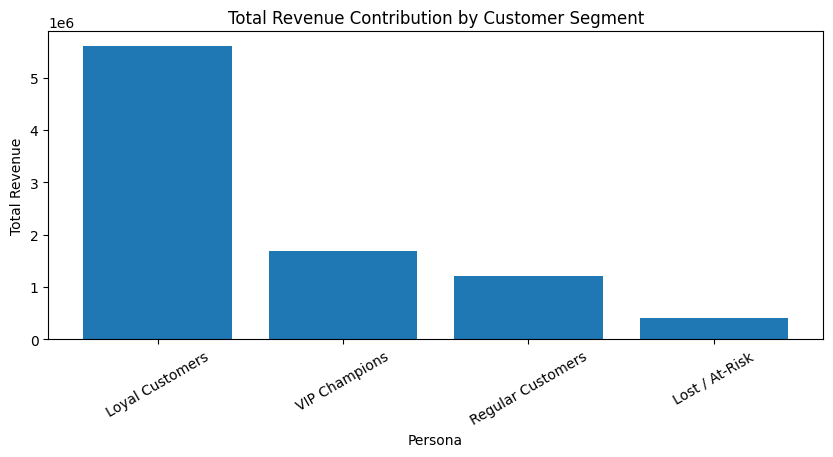

In [ ]:
import matplotlib.pyplot as plt

persona_revenue = persona_stats["TotalRevenue"].sort_values(ascending=False)

plt.figure(figsize=(10,4))
plt.bar(persona_revenue.index, persona_revenue.values)
plt.title("Total Revenue Contribution by Customer Segment")
plt.xlabel("Persona")
plt.ylabel("Total Revenue")
plt.xticks(rotation=30)
plt.show()


## 7. Ethical Considerations & Responsible AI

Although this project uses anonymized transactional data, responsible AI considerations are important:

- **Bias & Fairness:** Customers from certain countries or high-volume buyers may dominate the dataset and influence trend patterns.
- **Privacy:** CustomerID is anonymized and no personal identity is revealed.
- **Limitations of Forecasting:** Predictions can be impacted by sudden events (bulk orders, cancellations, seasonal spikes) that are not explicitly present as input features.
- **Responsible Usage:** The model should be used as a decision-support tool, not as a fully automated system for inventory planning.


## 8. Conclusion & Future Scope

### Conclusion
In this project, I built an AI-driven Market Trend Analysis system using online retail transaction data.  
I developed:
- a forecasting engine (XGBoost) for daily revenue prediction
- a decision-support engine that recommends stock actions with risk index
- customer segmentation using RFM + KMeans with business personas and targeted strategies

### Future Scope
- Add external features such as promotions, holidays, and macro trends for improved accuracy.
- Extend segmentation using product/category preferences and recommendation models.
- Automate alert generation for high-risk periods and sudden demand shifts.


In [ ]:
import joblib
import os

SAVE_DIR = "/content/drive/MyDrive/OnlineRetail_Capstone_App/models"
os.makedirs(SAVE_DIR, exist_ok=True)

# Save model
joblib.dump(xgb_best, f"{SAVE_DIR}/xgb_model.pkl")

# Save feature columns list
joblib.dump(feature_cols, f"{SAVE_DIR}/feature_cols.pkl")

# Save cap values (optional)
joblib.dump({"cap_train": cap_train}, f"{SAVE_DIR}/train_meta.pkl")

print("✅ Saved files in:", SAVE_DIR)
print(os.listdir(SAVE_DIR))


✅ Saved files in: /content/drive/MyDrive/OnlineRetail_Capstone_App/models
['xgb_model.pkl', 'feature_cols.pkl', 'train_meta.pkl']
